In [9]:
"""Importing necessary libraries"""

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.multicomp import MultiComparison
import statsmodels.api as sm

In [10]:
"""Doing Preliminary research here to understand the scope of the dataset"""

file=pd.read_csv("Employee_Performance-1.csv")
df=pd.DataFrame(file)
dep_list=file['Department'].unique()
print(df.head())
print(df.describe())
print(df.shape)
print(df.dtypes)
print(df.info)
duplicated=df[df.duplicated()]
print(duplicated)
missing_values=df.isnull()
print(missing_values.sum(),"\n")

   EmployeeID Department  Gender  Experience  TrainingHours  \
0        1001         IT    Male           4              5   
1        1002  Marketing  Female           0             50   
2        1003      Sales    Male           0              5   
3        1004         HR    Male           1              5   
4        1005         HR  Female           9              5   

   PerformanceRating  Salary  
0               1.00   19000  
1               5.50    6900  
2               1.00    6000  
3               1.00    6000  
4               1.04   38000  
        EmployeeID   Experience  TrainingHours  PerformanceRating  \
count  1468.000000  1468.000000    1468.000000        1468.000000   
mean   1734.500000     2.838556      32.144414           3.561512   
std     423.919411     2.527657      10.106029           1.044987   
min    1001.000000     0.000000       5.000000           1.000000   
25%    1367.750000     1.000000      25.000000           2.840000   
50%    1734.500000   

In [11]:
"""Scrubbing through numerical columns to find sources of outliers to decide how to deal with them"""

z_scores=zscore(df['TrainingHours'])
outliers=(np.abs(z_scores)>3)
print(df[outliers])

z_scores=zscore(df['PerformanceRating'])
outliers=(np.abs(z_scores)>3)
print(df[outliers])

z_scores=zscore(df['Salary'])
outliers=(np.abs(z_scores)>3)
print(df[outliers])

Empty DataFrame
Columns: [EmployeeID, Department, Gender, Experience, TrainingHours, PerformanceRating, Salary]
Index: []
Empty DataFrame
Columns: [EmployeeID, Department, Gender, Experience, TrainingHours, PerformanceRating, Salary]
Index: []
      EmployeeID Department  Gender  Experience  TrainingHours  \
1082        2083         IT  Female           9             35   
1189        2190         IT    Male           9             25   
1306        2307      Sales    Male           9             35   
1338        2339      Sales  Female           9             48   
1404        2405      Sales    Male           9             48   
1421        2422  Marketing  Female           9             48   
1460        2461         IT    Male           9             10   

      PerformanceRating  Salary  
1082               5.12   53010  
1189               5.12   53010  
1306               5.12   53010  
1338               5.19   53010  
1404               5.48   53020  
1421               5.50

Text(0.5, 1.0, 'Distribution of Performance Rating of Employees')

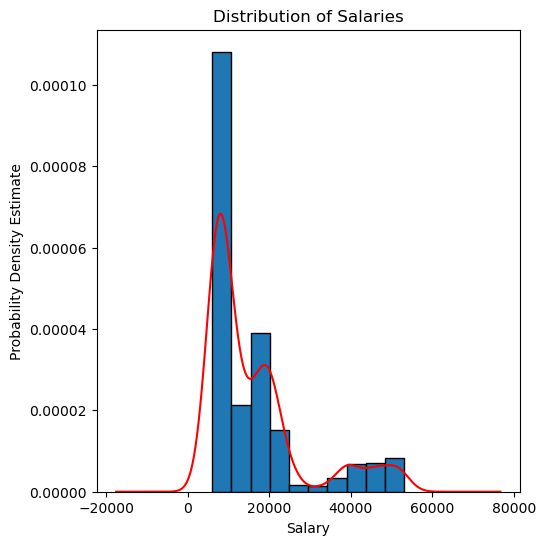

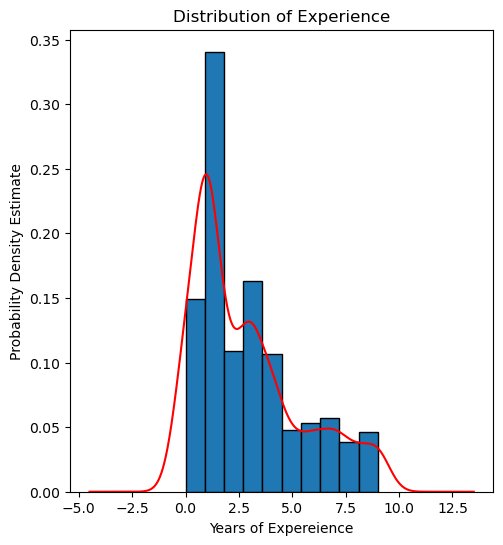

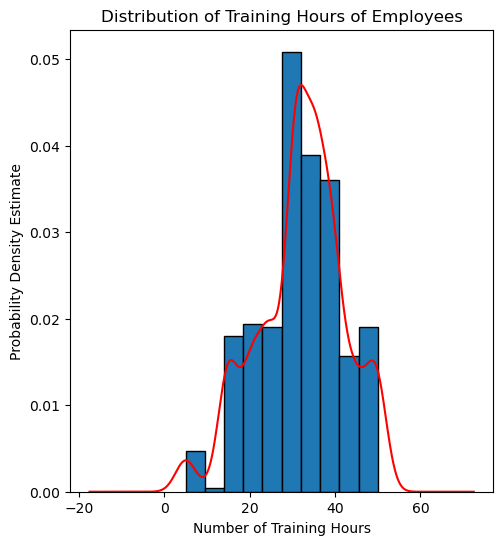

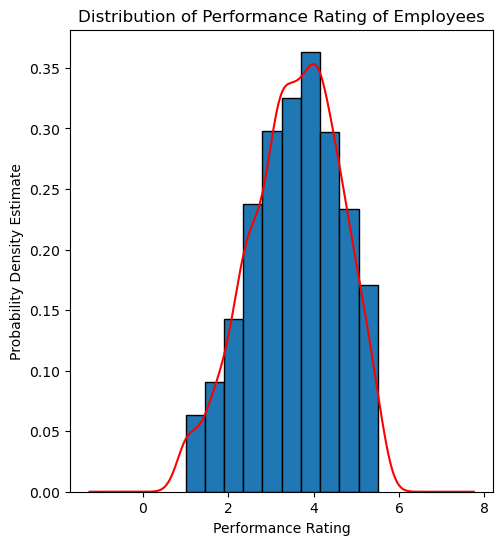

In [12]:
"""Here we determine the distribution of numerical values of the dataset"""

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.hist(df['Salary'],bins=10,edgecolor='black',density=True)
df['Salary'].plot.kde(color='red')
plt.xlabel('Salary')
plt.ylabel('Probability Density Estimate')
plt.title('Distribution of Salaries')

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.hist(df['Experience'],bins=10,edgecolor='black',density=True)
df['Experience'].plot.kde(color='red')
plt.xlabel('Years of Expereience')
plt.ylabel('Probability Density Estimate')
plt.title('Distribution of Experience')

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.hist(df['TrainingHours'],bins=10,edgecolor='black',density=True)
df['TrainingHours'].plot.kde(color='red')
plt.xlabel('Number of Training Hours')
plt.ylabel('Probability Density Estimate')
plt.title('Distribution of Training Hours of Employees')

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.hist(df['PerformanceRating'],bins=10,edgecolor='black',density=True)
df['PerformanceRating'].plot.kde(color='red')
plt.xlabel('Performance Rating')
plt.ylabel('Probability Density Estimate')
plt.title('Distribution of Performance Rating of Employees')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9')])

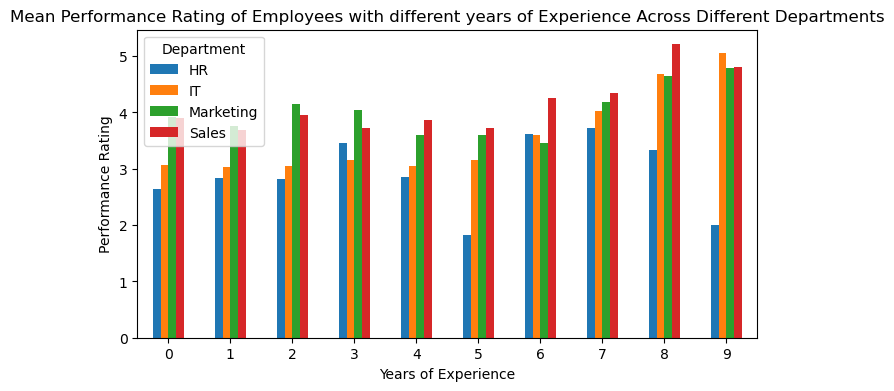

In [13]:
"""Here we explore the relationship between experience, department and Performance rating to map variables that may be co-linked"""

evp=df.groupby(['Experience','Department'])['PerformanceRating'].mean().unstack()
evp.plot(kind="bar",figsize=(8,4))

plt.xlabel('Years of Experience')
plt.ylabel('Performance Rating')
plt.title('Mean Performance Rating of Employees with different years of Experience Across Different Departments')
plt.xticks(rotation=0)

Text(0, 0.5, 'Performance Rating')

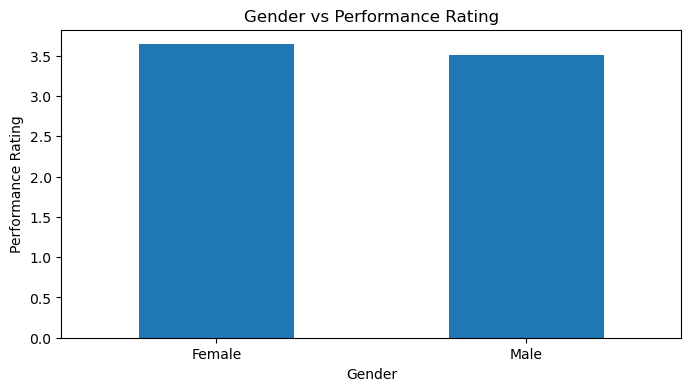

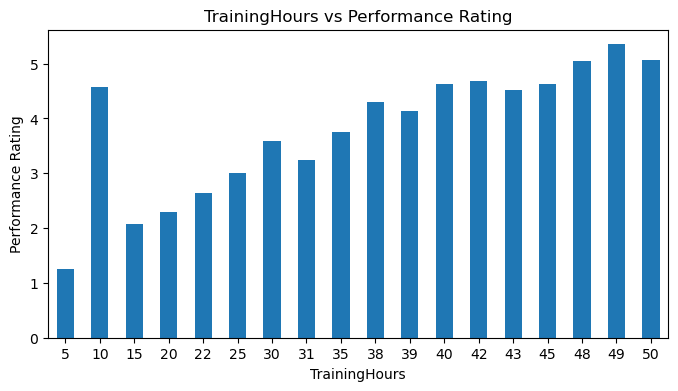

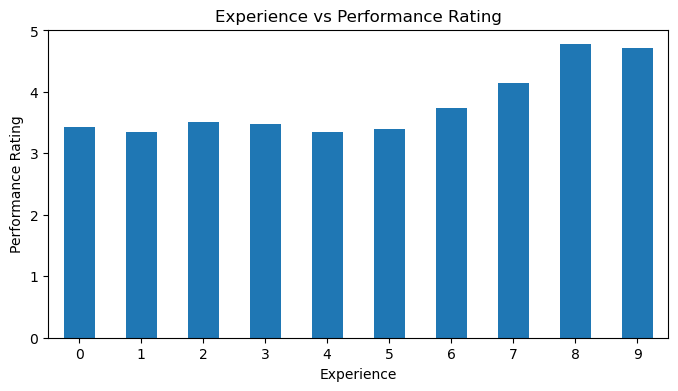

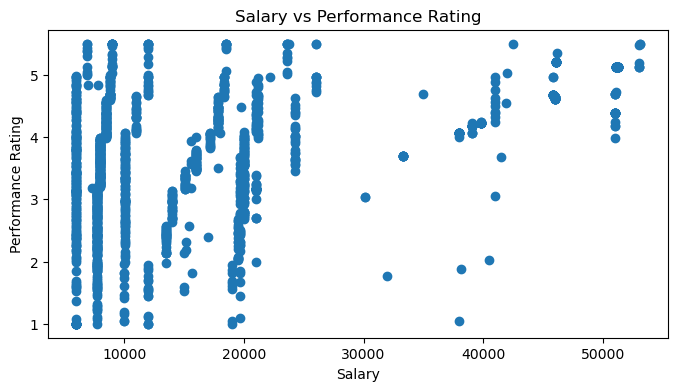

In [14]:
"""Investigate categorical values here"""

cat=['Gender','TrainingHours','Experience']
for i in cat:
    g=df.groupby(i)['PerformanceRating'].mean()
    plt.figure(figsize=(8,4))
    g.plot(kind="bar")
    plt.title(f'{i} vs Performance Rating')
    plt.ylabel('Performance Rating')
    plt.xticks(rotation=0)
plt.figure(figsize=(8,4))
plt.scatter(df['Salary'],df['PerformanceRating'])
plt.title('Salary vs Performance Rating')
plt.xlabel('Salary')
plt.ylabel('Performance Rating')

In [16]:
"""Explore group by department dataset """

print(df.groupby('Department').size())
print(df.groupby('Gender').size())
print(df.groupby('Salary'))
print(df.groupby('Department')['PerformanceRating'].mean())
print(df.groupby('Department')['PerformanceRating'].var())

Department
HR            63
IT           720
Marketing    240
Sales        445
dtype: int64
Gender
Female    585
Male      883
dtype: int64
Department
HR           2.900476
IT           3.272014
Marketing    3.927500
Sales        3.926112
Name: PerformanceRating, dtype: float64
Department
HR           0.957463
IT           1.073170
Marketing    0.873183
Sales        0.862889
Name: PerformanceRating, dtype: float64


In [15]:
"""ANOVA Analysis here"""

grouped_data = [df[df['Department'] == dep]['PerformanceRating'] for dep in dep_list]
f_statistic, p_value = stats.f_oneway(*grouped_data)
print("One-way ANOVA Results:")
print(f"F-statistic: {f_statistic:.2f}")
print(f"P-value: {p_value:.4f}")

One-way ANOVA Results:
F-statistic: 61.45
P-value: 0.0000


In [22]:
"""Gathering Values for ANOVA Analysis to determine signifcance of findings"""

df_within=len(dep_list)-1
df_between=len(df)-len(dep_list)
print(f"Degree of Freedom within the dataset: {df_within}\nDegree of Freedom between the dataset: {df_between}")
alpha=0.05
critical_f_value = stats.f.ppf(1 - alpha, df_between, df_within)
print(f"Critical f-value:{critical_f_value}")

Degree of Freedom within the dataset: 3
Degree of Freedom between the dataset: 1464
Critical f-value:8.528336500713385


In [24]:
"""Tukey HSD Analysis"""

multicomp = MultiComparison(df['PerformanceRating'], df['Department'])
result = multicomp.tukeyhsd()
print(result)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1    group2  meandiff p-adj   lower  upper  reject
---------------------------------------------------------
       HR        IT   0.3715 0.0217  0.0384 0.7047   True
       HR Marketing    1.027    0.0  0.6681  1.386   True
       HR     Sales   1.0256    0.0  0.6843 1.3669   True
       IT Marketing   0.6555    0.0  0.4665 0.8445   True
       IT     Sales   0.6541    0.0  0.5012  0.807   True
Marketing     Sales  -0.0014    1.0 -0.2044 0.2017  False
---------------------------------------------------------


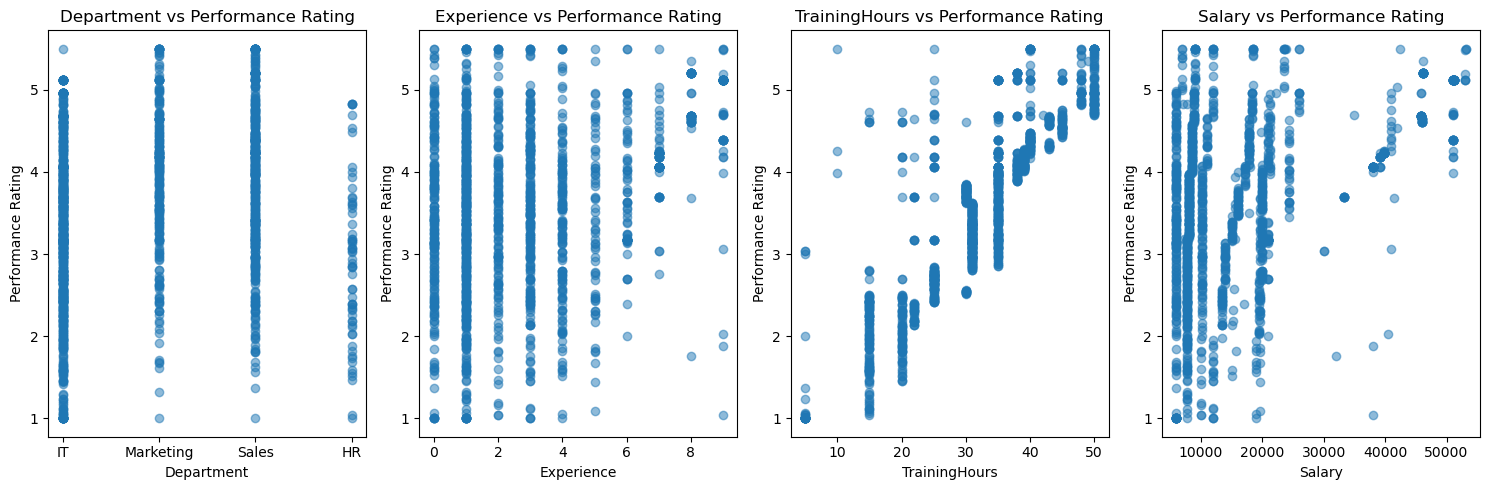

In [27]:
"""Testing assumptions for Simple Linear Regression here. This block is to test for linearity between performance rating and other variables"""

dep_mapping = {
     1:'HR',
     2:'IT',
     3:'Marketing',
     4:'Sales'
}

df['Department'] = df['Department'].replace(dep_mapping)

X = df[[ 'Department', 'Experience', 'TrainingHours', 'Salary']]

y = df['PerformanceRating']

fig, axes = plt.subplots(nrows=1, ncols=len(X.columns), figsize=(15, 5))

for i, col in enumerate(X.columns):
    axes[i].scatter(X[col], y, alpha=0.5)
    axes[i].set_title(f'{col} vs Performance Rating')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Performance Rating')

plt.tight_layout()
plt.show()

                            OLS Regression Results                            
Dep. Variable:      PerformanceRating   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     4148.
Date:                Sat, 14 Dec 2024   Prob (F-statistic):               0.00
Time:                        12:32:00   Log-Likelihood:                -1161.5
No. Observations:                1468   AIC:                             2327.
Df Residuals:                    1466   BIC:                             2338.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.7044      0.046     15.149

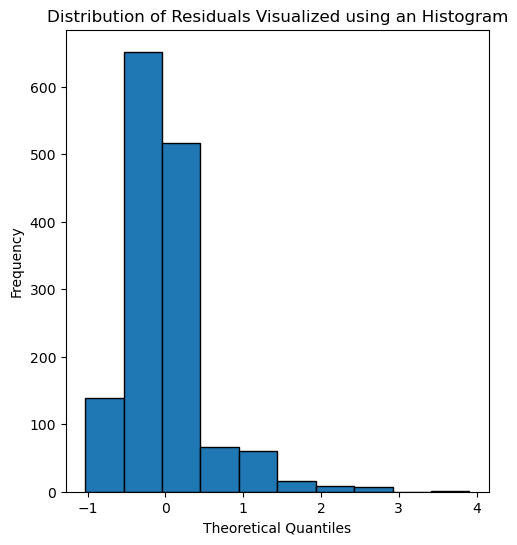

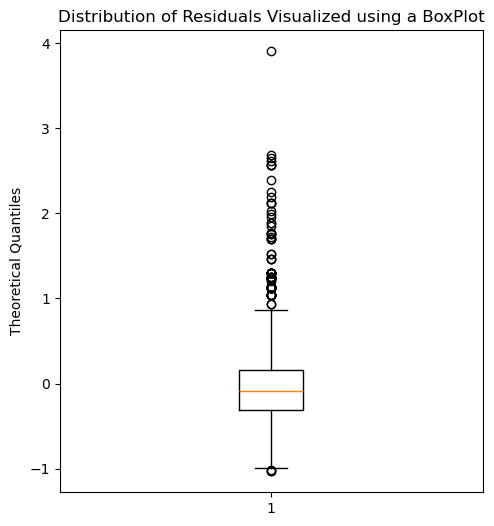

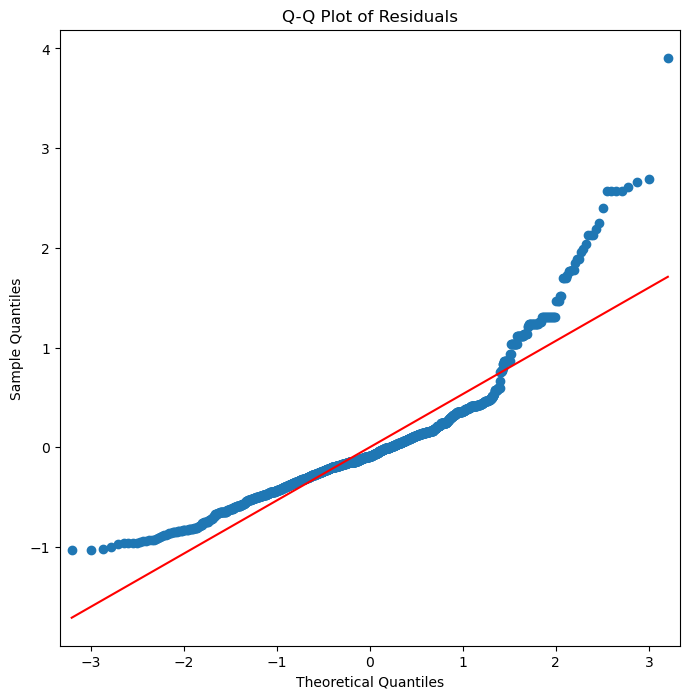

Anderson-Darling Statistic: 42.39231287005691
Critical Values: [0.574 0.654 0.785 0.916 1.089]
Significance Levels: [15.  10.   5.   2.5  1. ]


In [36]:
"""Regression Here with an analysis of residuals"""

X = df['TrainingHours']

y = df['PerformanceRating']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

residuals = model.resid

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.hist(residuals,bins=10,edgecolor='black')
plt.title('Distribution of Residuals Visualized using an Histogram')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Frequency')

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Distribution of Residuals Visualized using a BoxPlot')
plt.ylabel('Theoretical Quantiles')
plt.boxplot(residuals)

fig, ax = plt.subplots(figsize=(8, 8))
sm.qqplot(residuals, line='s', ax=ax)
plt.title("Q-Q Plot of Residuals")
plt.show()

result = stats.anderson(residuals, dist='norm')

ad_statistic = result.statistic
ad_critical_values = result.critical_values
ad_significance_levels = result.significance_level

print("Anderson-Darling Statistic:", ad_statistic)
print("Critical Values:", ad_critical_values)
print("Significance Levels:", ad_significance_levels)

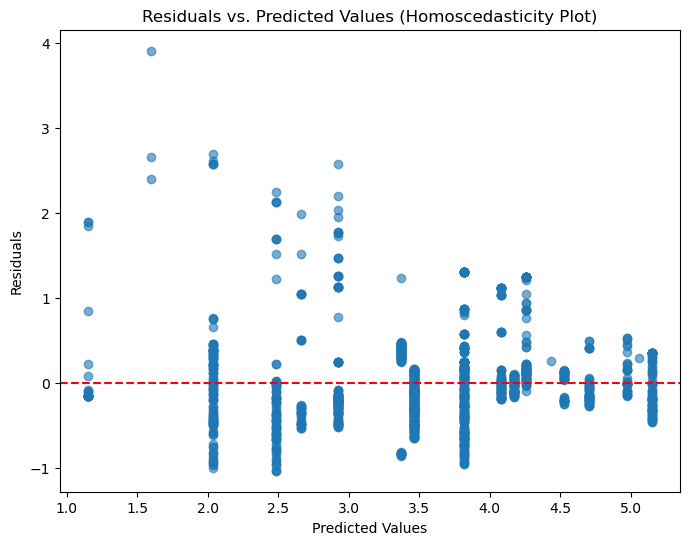

In [29]:
"""Homoscedasticity test""""

predicted_values = model.fittedvalues


residuals = model.resid


plt.figure(figsize=(8, 6))
plt.scatter(predicted_values, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values (Homoscedasticity Plot)")
plt.show()